In [193]:
#importinglibraries
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [194]:
#to read data from an Excel file and load it into a Pandas DataFrame
df = pd.read_excel(r'C:\Users\Admin\Desktop\customer_churn_large_dataset.xlsx')

# Exploratory Data Analysis (EDA)

In [195]:
#The df.head() method is used to display the first few rows of a Pandas DataFrame.
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [196]:
#to retrieve the dimensions of a DataFrame
df.shape

(100000, 9)

In [197]:
#to obtain a concise summary of the DataFrame's structure and information. 
#It provides details about the data types, non-null counts, memory usage, and more for each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [198]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [199]:
# Check the descriptive statistics of numeric variables
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [200]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [201]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [202]:
#isnull().sum() used to count the number of missing (null) values in each column
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

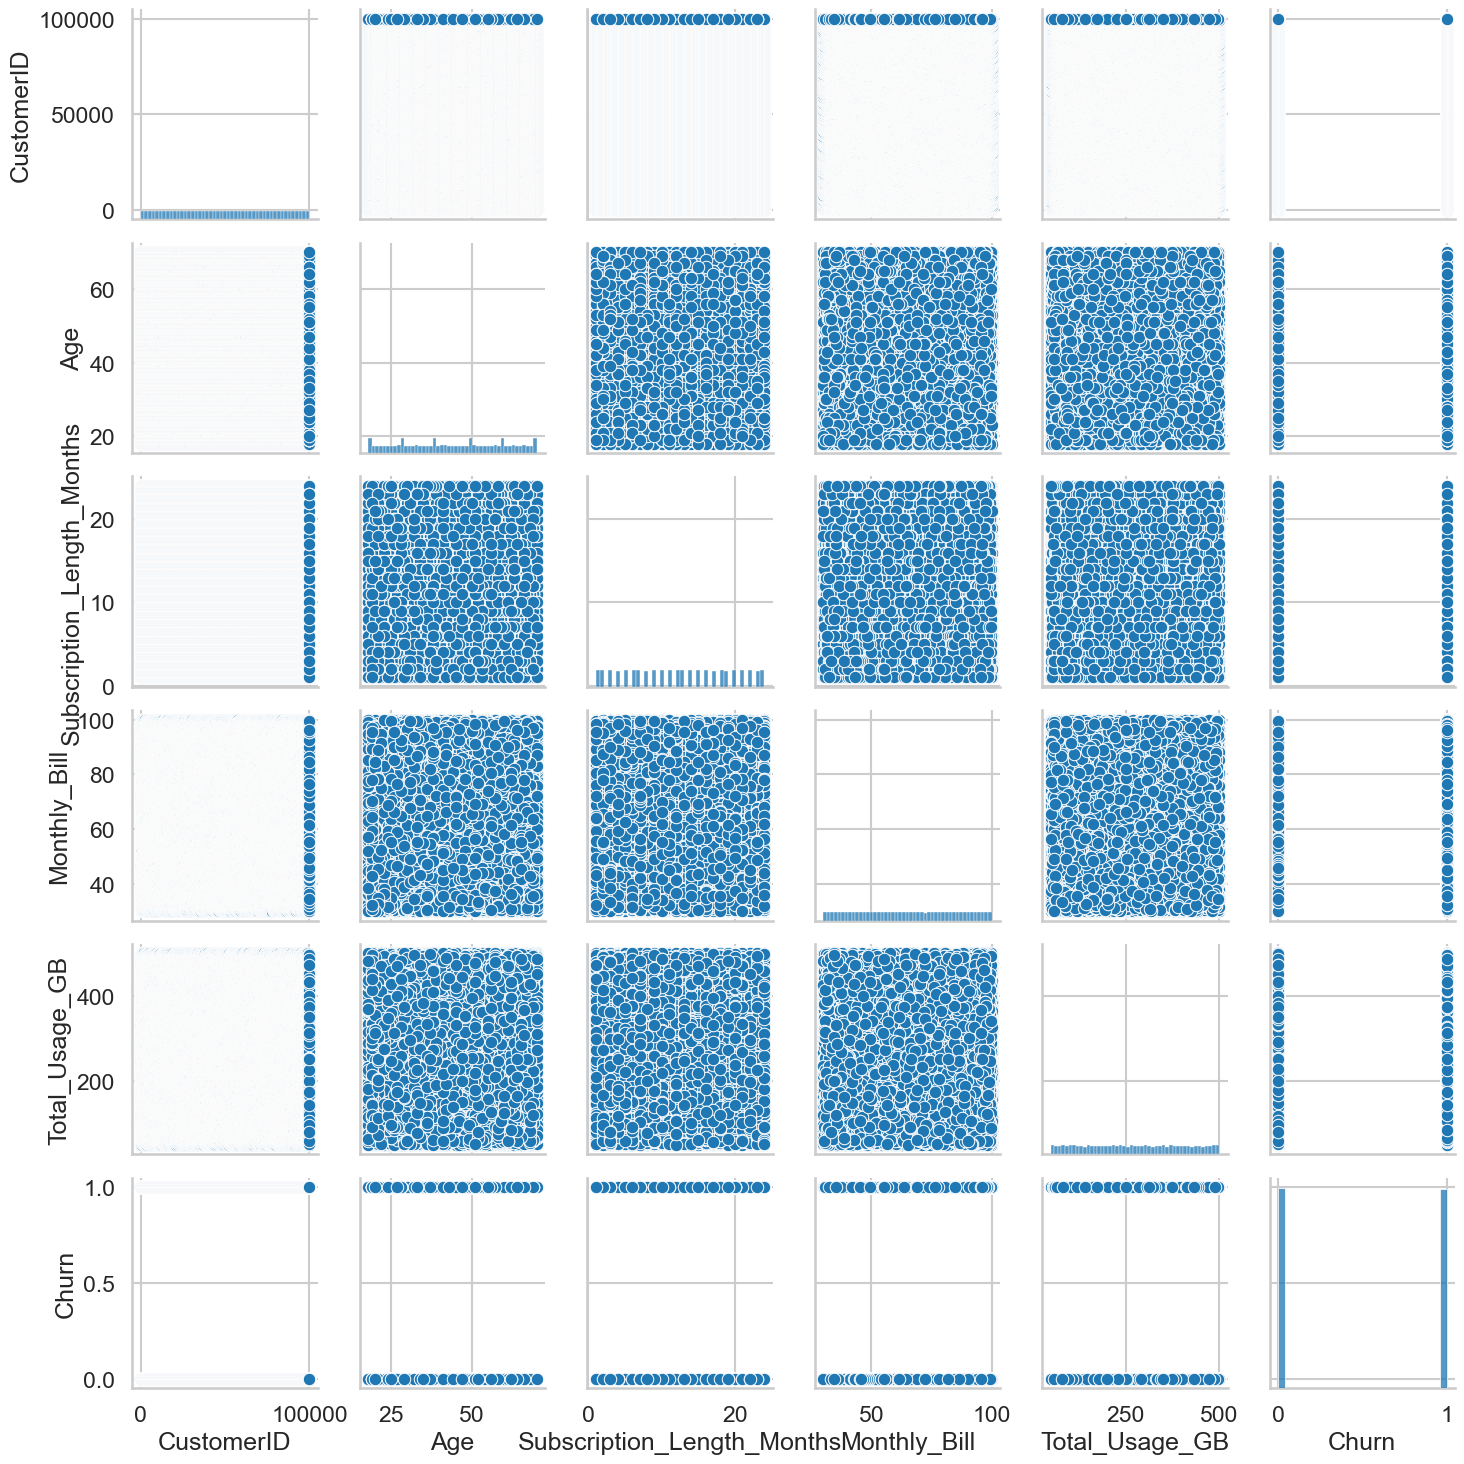

In [203]:
sns.pairplot(df)

# Handling outliers


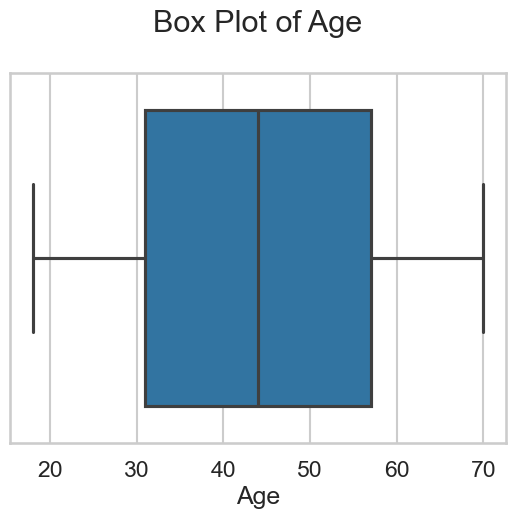

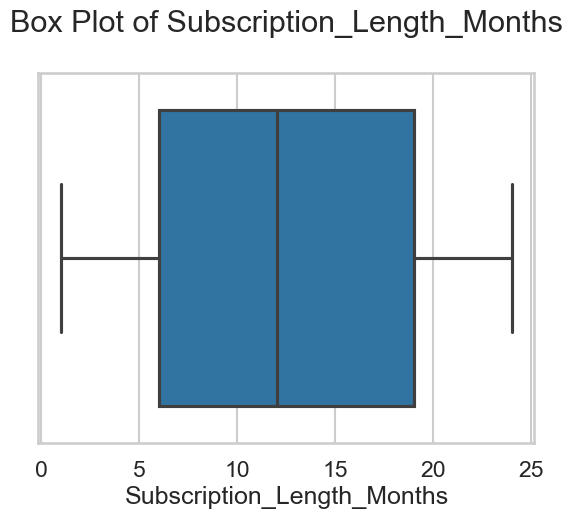

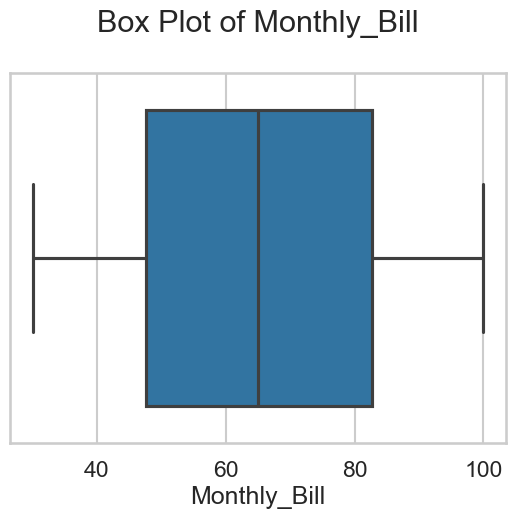

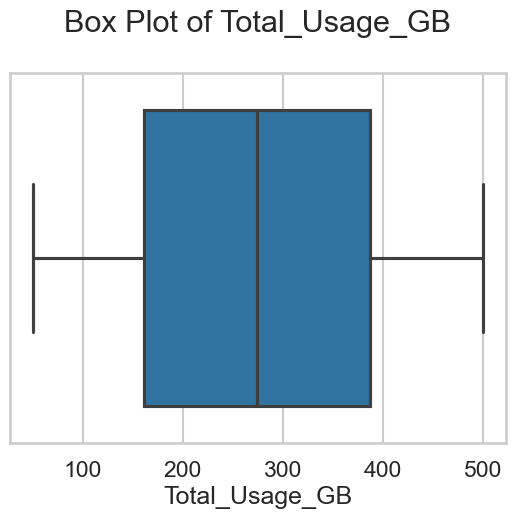

In [204]:
#1. Box Plot
# Create box plots for numerical columns
numerical_columns = ["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [205]:
#2. Z score
from scipy import stats

for column in numerical_columns:
    z_scores = stats.zscore(df[column])
    outliers = (z_scores > 3) | (z_scores < -3)
    print(f'Outliers in {column}: {sum(outliers)}')


Outliers in Age: 0
Outliers in Subscription_Length_Months: 0
Outliers in Monthly_Bill: 0
Outliers in Total_Usage_GB: 0


In [206]:
#3. IQR
for column in numerical_columns:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f'Outliers in {column}: {sum(outliers)}')

Outliers in Age: 0
Outliers in Subscription_Length_Months: 0
Outliers in Monthly_Bill: 0
Outliers in Total_Usage_GB: 0


No significant outliers were detected in the dataset

# Data Cleaning
1. Create a copy of base data for manupulation & processing

In [207]:
df1 = df.copy()

In [208]:
#max of Subscription_Length_Months
df1['Subscription_Length_Months'].max()

24

In [209]:
# Divide customers into bins based on 'Subscription_Length_Months_grouping' and 'Age_grouping'

In [210]:
# Group the Subscription_Length_Months in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 24, 12)]

df1['Subscription_Length_Months_grouping'] = pd.cut(df1.Subscription_Length_Months, range(1, 30, 12), right=False, labels=labels)

In [211]:
#max of Subscription_Length_Months
df1['Age'].max()

70

In [212]:
# Group the Age_grouping in bins of 18
labels = ["{0} - {1}".format(i, i + 17) for i in range(1, 70, 18)]

df1['Age_grouping'] = pd.cut(df1.Age, range(1, 76, 18), right=False, labels=labels)

In [213]:
df1['Subscription_Length_Months_grouping'].value_counts()

1 - 12     50021
13 - 24    49979
Name: Subscription_Length_Months_grouping, dtype: int64

In [214]:
#drop column customerID and name
df1.drop(columns= ['CustomerID','Name'], axis=1, inplace=True)
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Months_grouping,Age_grouping
0,63,Male,Los Angeles,17,73.36,236,0,13 - 24,55 - 72
1,62,Female,New York,1,48.76,172,0,1 - 12,55 - 72
2,24,Female,Los Angeles,5,85.47,460,0,1 - 12,19 - 36
3,36,Female,Miami,3,97.94,297,1,1 - 12,19 - 36
4,46,Female,Miami,19,58.14,266,0,13 - 24,37 - 54


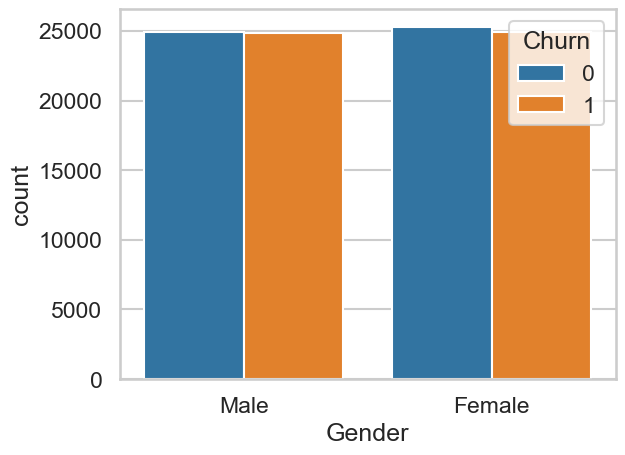

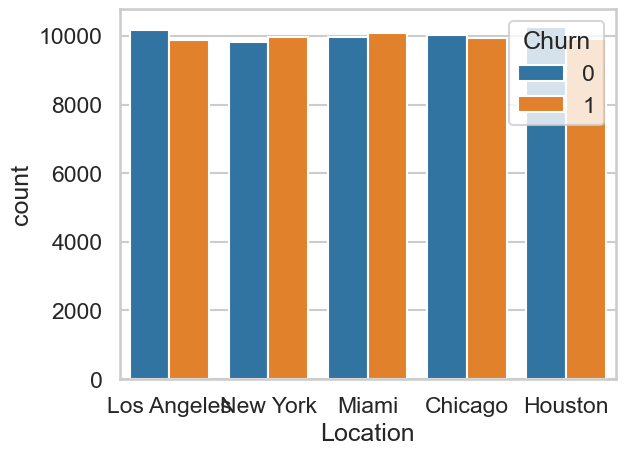

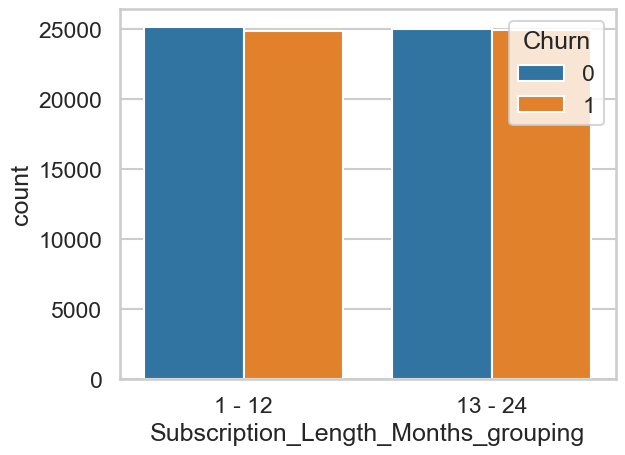

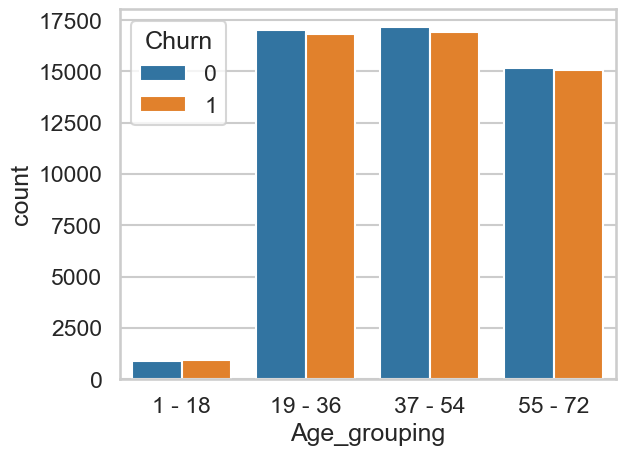

In [215]:
for i, predictor in enumerate(df1.drop(columns=['Churn', 'Monthly_Bill', 'Total_Usage_GB','Age','Subscription_Length_Months'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='Churn')

In [216]:
#Feature Engineering:
#creating new features 'Total_Bill', that might help improve the model's performance. 
df1['Total_Bill'] = df1['Monthly_Bill'] * df1['Subscription_Length_Months']

In [217]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Months_grouping,Age_grouping,Total_Bill
0,63,Male,Los Angeles,17,73.36,236,0,13 - 24,55 - 72,1247.12
1,62,Female,New York,1,48.76,172,0,1 - 12,55 - 72,48.76
2,24,Female,Los Angeles,5,85.47,460,0,1 - 12,19 - 36,427.35
3,36,Female,Miami,3,97.94,297,1,1 - 12,19 - 36,293.82
4,46,Female,Miami,19,58.14,266,0,13 - 24,37 - 54,1104.66


C:\Users\Admin\AppData\Local\Temp\ipykernel_11148\188939404.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[df1['Churn'] == 0]['Monthly_Bill'], label='Not Churned', shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11148\188939404.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[df1['Churn'] == 1]['Monthly_Bill'], label='Churned', shade=True)


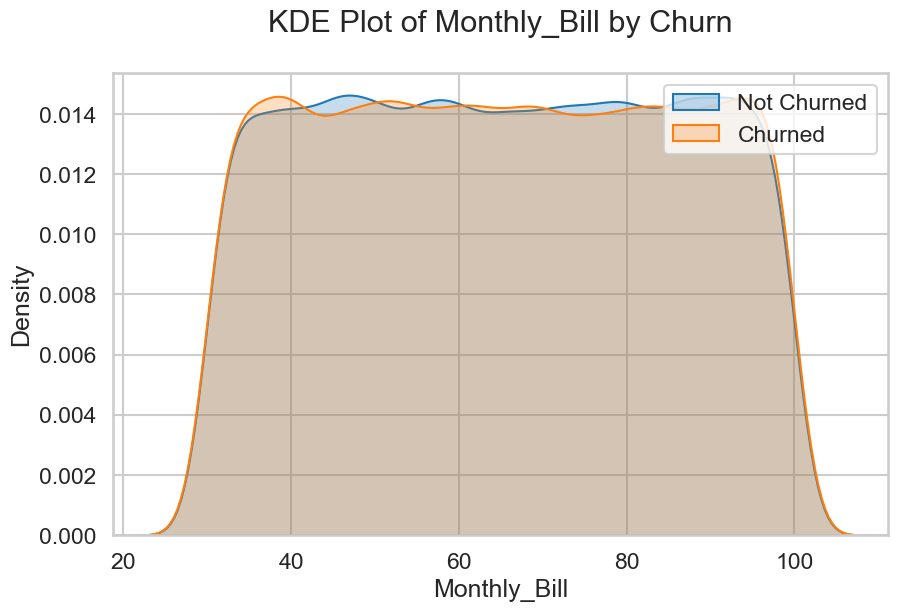

C:\Users\Admin\AppData\Local\Temp\ipykernel_11148\188939404.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[df1['Churn'] == 0]['Total_Bill'], label='Not Churned', shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11148\188939404.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[df1['Churn'] == 1]['Total_Bill'], label='Churned', shade=True)


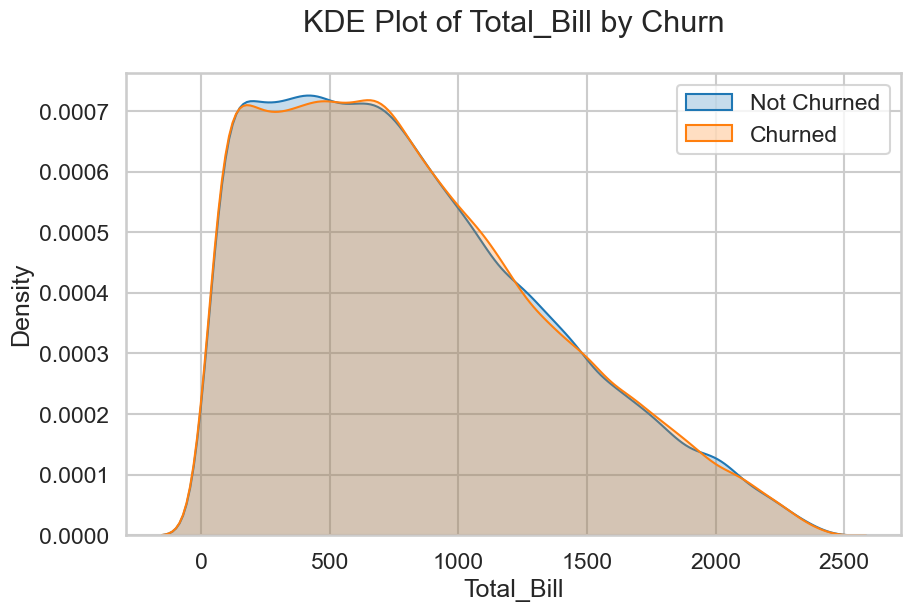

In [218]:
# Create a KDE plot for 'Monthly_Bill' by 'Churn'
plt.figure(figsize=(10, 6))
sns.kdeplot(df1[df1['Churn'] == 0]['Monthly_Bill'], label='Not Churned', shade=True)
sns.kdeplot(df1[df1['Churn'] == 1]['Monthly_Bill'], label='Churned', shade=True)
plt.xlabel('Monthly_Bill')
plt.ylabel('Density')
plt.title('KDE Plot of Monthly_Bill by Churn')
plt.legend()
plt.show()

# Create a KDE plot for 'Total_Bill' by 'Churn'
plt.figure(figsize=(10, 6))
sns.kdeplot(df1[df1['Churn'] == 0]['Total_Bill'], label='Not Churned', shade=True)
sns.kdeplot(df1[df1['Churn'] == 1]['Total_Bill'], label='Churned', shade=True)
plt.xlabel('Total_Bill')
plt.ylabel('Density')
plt.title('KDE Plot of Total_Bill by Churn')
plt.legend()
plt.show()

Surprising insight as higher Churn at lower Total Bill

However if we combine the insights of 3 parameters i.e. Subscription_Length_Months, Monthly bill & Total bill then the picture is bit clear :- Higher Monthly bill at lower Subscription_Length_Months results into lower Total bill. Hence, all these 3 factors viz Higher Monthly bill, Lower Subscription_Length_Months and Lower Total bill are linked to High Churn.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11148\3553307663.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.drop(columns=columns_to_drop).corr()


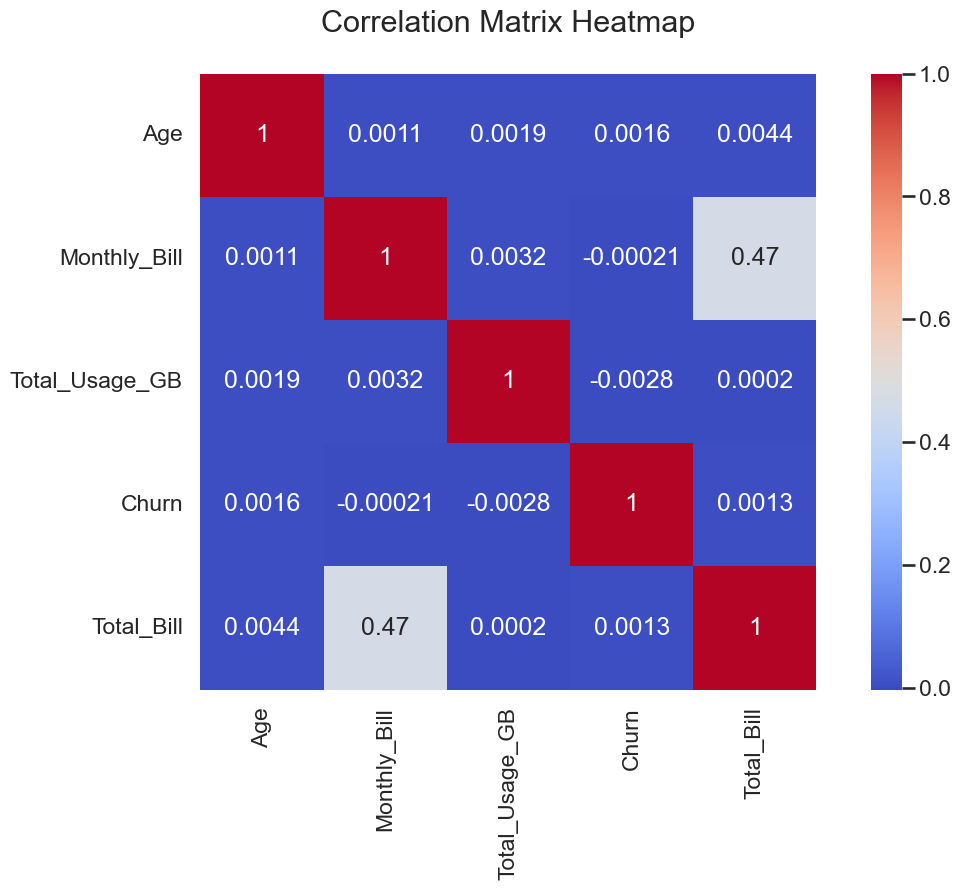

In [219]:
columns_to_drop = ['Subscription_Length_Months', 'Age_grouping',]
#df1.drop(columns=columns_to_drop).corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#plt.figure(figsize=(20,8))
#df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


correlation_matrix = df1.drop(columns=columns_to_drop).corr()




plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [220]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Months_grouping,Age_grouping,Total_Bill
0,63,Male,Los Angeles,17,73.36,236,0,13 - 24,55 - 72,1247.12
1,62,Female,New York,1,48.76,172,0,1 - 12,55 - 72,48.76
2,24,Female,Los Angeles,5,85.47,460,0,1 - 12,19 - 36,427.35
3,36,Female,Miami,3,97.94,297,1,1 - 12,19 - 36,293.82
4,46,Female,Miami,19,58.14,266,0,13 - 24,37 - 54,1104.66


In [221]:
new_df1_target0=df1.loc[df1["Churn"]==0]
new_df1_target1=df1.loc[df1["Churn"]==1]

In [222]:
def uniplot(data,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = data, x= col, order=data[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

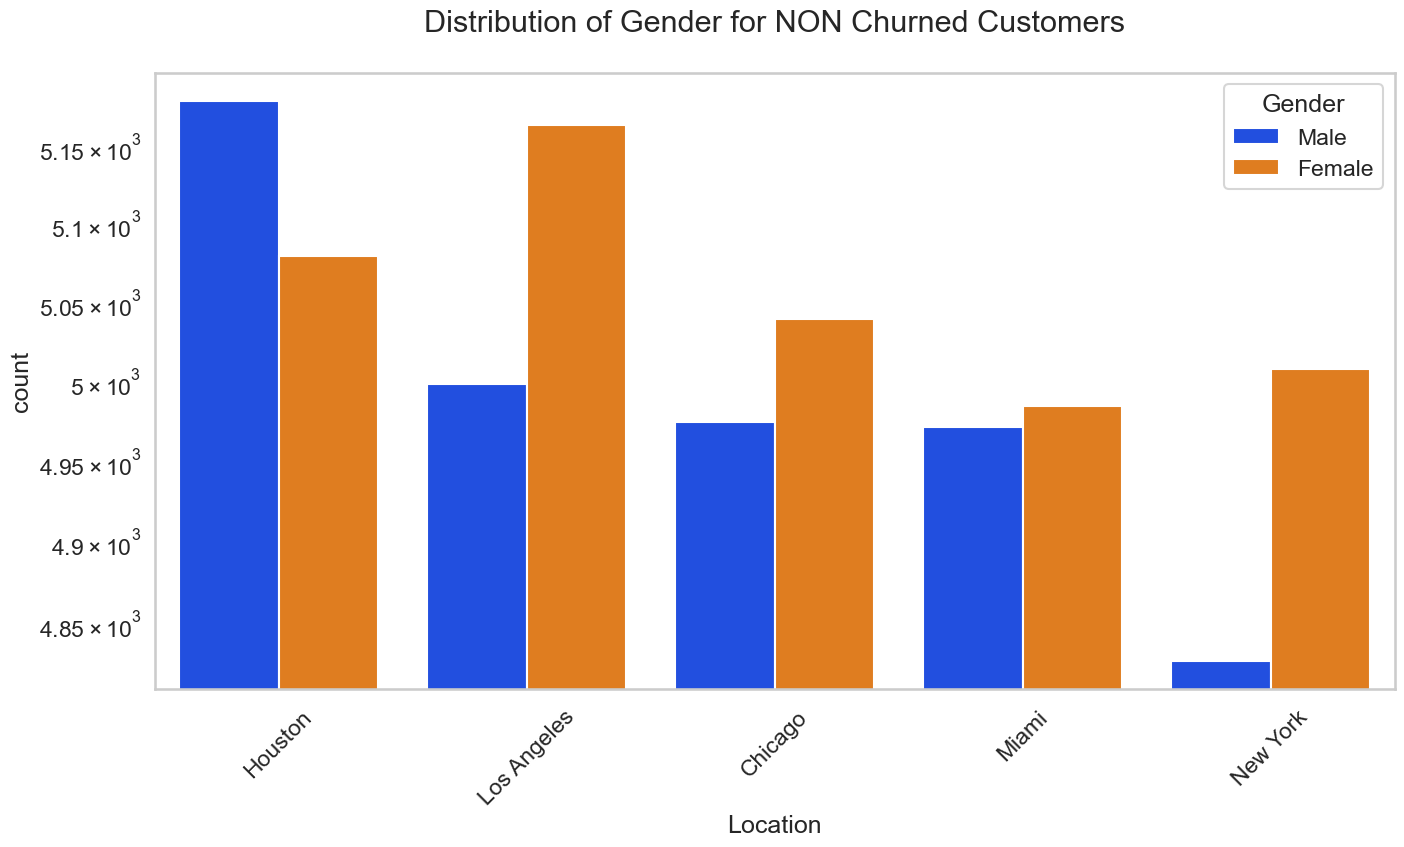

In [223]:
uniplot(new_df1_target0,col='Location',title='Distribution of Gender for NON Churned Customers',hue='Gender')

Location "Houstan" shows highest non churners wrt male, where as location "Los Angeles" shows highest non churners wrt female

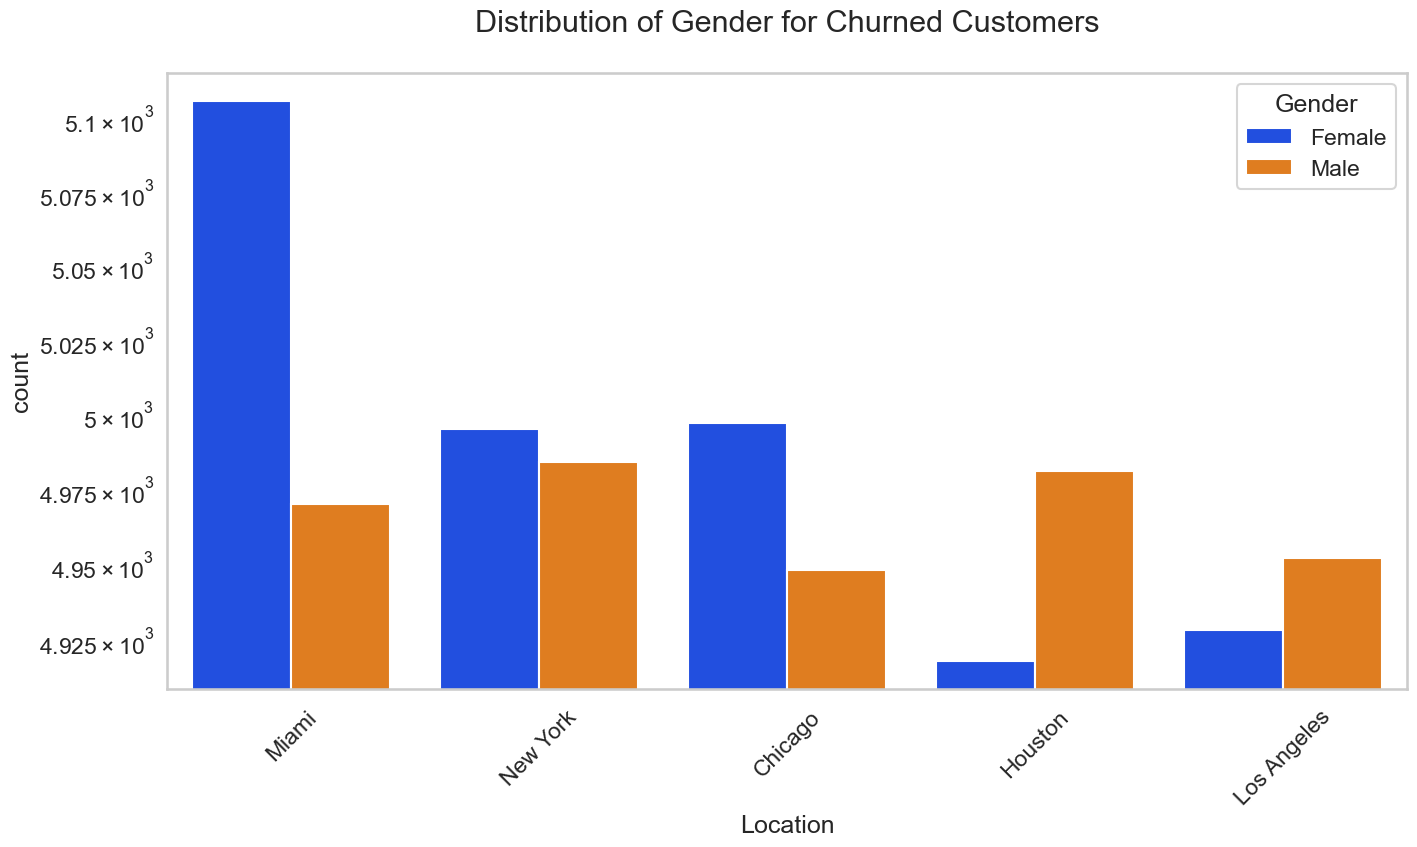

In [224]:
uniplot(new_df1_target1,col='Location',title='Distribution of Gender for Churned Customers',hue='Gender')

Location "Miami" shows highest churners wrt male, where as location "New York" shows highest churners wrt female

In [225]:
#Data Preprocessing:
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Location'] = label_encoder.fit_transform(df1['Location'])
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Months_grouping,Age_grouping,Total_Bill
0,63,1,2,17,73.36,236,0,13 - 24,55 - 72,1247.12
1,62,0,4,1,48.76,172,0,1 - 12,55 - 72,48.76
2,24,0,2,5,85.47,460,0,1 - 12,19 - 36,427.35
3,36,0,3,3,97.94,297,1,1 - 12,19 - 36,293.82
4,46,0,3,19,58.14,266,0,13 - 24,37 - 54,1104.66


In [226]:

df1.drop(columns= ['Subscription_Length_Months_grouping','Age_grouping'], axis=1, inplace=True)
# dropping the columns for model building

In [227]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill
0,63,1,2,17,73.36,236,0,1247.12
1,62,0,4,1,48.76,172,0,48.76
2,24,0,2,5,85.47,460,0,427.35
3,36,0,3,3,97.94,297,1,293.82
4,46,0,3,19,58.14,266,0,1104.66


In [228]:
#df1.to_excel('customer_churn.xlsx', index=False)

# Data Processing: Split the data into training and testing sets


In [229]:
# Split data into features (X) and the target variable (y)
X = df1.drop(columns=['Churn'])
y = df1['Churn'] 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building  1. KNN

In [231]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [232]:
# Make predictions on the scaled test data
y_pred = knn.predict(X_test_scaled)

In [233]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("");
# classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion_matrix:\n");
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5004

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.50      0.50      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion_matrix:

[[5075 5004]
 [4988 4933]]


Using the SMOTE-ENN (Synthetic Minority Over-sampling Technique - Edited Nearest Neighbors) technique for handling class imbalance in data. SMOTE-ENN combines the oversampling of the minority class using SMOTE with the undersampling of the majority class using ENN. 

In [234]:
from imblearn.combine import SMOTEENN

# Create an instance of SMOTE-ENN
smote_enn = SMOTEENN()

# Resample  data using SMOTE-ENN
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [236]:
# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=5)  

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [237]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [238]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("");

# classification report and confusion matrix
print("Classification Report:\n");
print(classification_report(y_test, y_pred))
print("Confusion_matrix:\n");
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7039345539540319

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1273
           1       0.70      0.71      0.71      1294

    accuracy                           0.70      2567
   macro avg       0.70      0.70      0.70      2567
weighted avg       0.70      0.70      0.70      2567

Confusion_matrix:

[[887 386]
 [374 920]]


# 2. DecisionTree

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=6, min_samples_leaf=8)


In [241]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [242]:
y_preddt = dt.predict(X_test)

In [243]:
accuracy = accuracy_score(y_test, y_preddt)
print(f"Accuracy: {accuracy}")
print("");

# classification report and confusion matrix
print("Classification Report:\n");
print(classification_report(y_test, y_preddt))
print("Confusion_matrix:\n");
print(confusion_matrix(y_test, y_preddt))

Accuracy: 0.5161667315932996

Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.09      0.15      1273
           1       0.51      0.94      0.66      1294

    accuracy                           0.52      2567
   macro avg       0.55      0.51      0.41      2567
weighted avg       0.55      0.52      0.41      2567

Confusion_matrix:

[[ 109 1164]
 [  78 1216]]


# 3. Random Forest

In [244]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [246]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [247]:
y_predrf = rf.predict(X_test)

In [248]:
accuracy = accuracy_score(y_test, y_predrf)
print(f"Accuracy: {accuracy}")
print("");

#  classification report and confusion matrix
print("Classification Report:\n");
print(classification_report(y_test, y_predrf))
print("Confusion_matrix:\n");
print(confusion_matrix(y_test, y_predrf))

Accuracy: 0.5407089988313206

Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.32      0.41      1273
           1       0.53      0.76      0.62      1294

    accuracy                           0.54      2567
   macro avg       0.55      0.54      0.52      2567
weighted avg       0.55      0.54      0.52      2567

Confusion_matrix:

[[407 866]
 [313 981]]


# Since KNN gave highest f1 score compared to other model. hence choose the knn model for Optimization 

# Model Optimization 
# 1.cross validation

In [249]:
from sklearn.model_selection import cross_val_score

# to Create a KNN classifier
knn = KNeighborsClassifier()

# to Define a range of n_neighbors values to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# to Perform 5-fold cross-validation to assess model performance for each n_neighbors value
cross_val_scores = []

for n_neighbors in param_grid['n_neighbors']:
    knn.set_params(n_neighbors=n_neighbors)
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=5, scoring='accuracy')
    cross_val_scores.append((n_neighbors, scores.mean()))

# to Print cross-validation results
for n_neighbors, mean_score in cross_val_scores:
    print(f"n_neighbors={n_neighbors}: Mean Accuracy={mean_score:.2f}")

n_neighbors=3: Mean Accuracy=0.76
n_neighbors=5: Mean Accuracy=0.71
n_neighbors=7: Mean Accuracy=0.67
n_neighbors=9: Mean Accuracy=0.65
n_neighbors=11: Mean Accuracy=0.64


# 2. Grid Search:

In [250]:
from sklearn.model_selection import GridSearchCV

# to Create a KNN classifier
knn = KNeighborsClassifier()

# To Define a range of hyperparameter values to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# To Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# ToGet the best hyperparameter values
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best Accuracy: {best_accuracy:.2f}")

Best n_neighbors: 3
Best Accuracy: 0.76


In [251]:
knn_best = KNeighborsClassifier(n_neighbors=3)

In [252]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [253]:
y_pred_best = knn_best.predict(X_test)

In [254]:
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy}")
print("");

# classification report and confusion matrix
print("Classification Report:\n");
print(classification_report(y_test, y_pred_best))
print("Confusion_matrix:\n");
print(confusion_matrix(y_test, y_pred_best))

Accuracy: 0.7600311647837943

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1273
           1       0.76      0.77      0.76      1294

    accuracy                           0.76      2567
   macro avg       0.76      0.76      0.76      2567
weighted avg       0.76      0.76      0.76      2567

Confusion_matrix:

[[953 320]
 [296 998]]


# Model Deployment:

In [255]:
import joblib

# To Save the trained KNN model to a file
joblib.dump(knn_best, 'knn_churn_model.pkl')

['knn_churn_model.pkl']